#### Importing packages

In [92]:
#python packages for data analysis
import pandas as pd
import numpy as np

In [93]:
# loading data set.
df = pd.read_csv(r'C:\Users\sbhardw\Downloads\flipkart_mobile_data.csv')
display(df.shape, df.head())

(696, 15)

,Price_in_Rupees,Mobiles,Colors,Off(%),Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Display,Secondary_Camera(MP),Primary_Camera(MP),Battery_details,Warranty(Year),Rating
0,5999,RealmeC2,DiamondBlack,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5
1,5999,RealmeC2,DiamondBlue,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5
2,8990,SamsungGalaxyOnNxt,Gold,49,3 GB,64 GB,256 GB,yes,5.5,FullHDDisplay,8,13,3300,1,4.3
3,10000,OPPOA37f,Grey,10,2 GB,16 GB,128 GB,yes,5.0,HDDisplay,5,8,2630,1,4.2
4,10000,OPPOA71,Gold,10,3 GB,16 GB,256 GB,yes,5.2,HDDisplay,5,13,3000,1,4.2


In [94]:
# Dropping the duplicates
print(df.duplicated(subset=None, keep='first').sum())
df1 = df.drop_duplicates(keep = 'first', inplace = False)
display(df.shape, df1.shape)

290


(696, 15)

(406, 15)

In [95]:
# Dropping NAs
display(df1.shape, df1.isnull().sum())

(406, 15)

Price_in_Rupees          0
Mobiles                  0
Colors                   2
Off(%)                   0
Ram                      0
Rom                      8
Expandable_GB/TB         0
Dual_sim                 0
Screen_in_inch           0
Display                 78
Secondary_Camera(MP)     0
Primary_Camera(MP)       0
Battery_details          0
Warranty(Year)           0
Rating                   0
dtype: int64

In [96]:
df1.dropna(inplace=True)
display(df1.isnull().sum().any(), df1.shape, df1.head(2))

C:\Users\sbhardw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False

(319, 15)

,Price_in_Rupees,Mobiles,Colors,Off(%),Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Display,Secondary_Camera(MP),Primary_Camera(MP),Battery_details,Warranty(Year),Rating
0,5999,RealmeC2,DiamondBlack,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5
1,5999,RealmeC2,DiamondBlue,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5


In [97]:
# Converting column names into lower case
df1.columns = [df1.columns.to_list()[i].lower() for i in range(len(df1.columns.to_list()))]

# Converting data into lower case
df2 = df1.apply(lambda x: x.astype(str).str.lower())
display(df2.shape, df2.head(2))

(319, 15)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,dual_sim,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
0,5999,realmec2,diamondblack,14,2 gb,16 gb,256 gb,yes,6.1,hd,5,13 + 2,4000,1,4.5
1,5999,realmec2,diamondblue,14,2 gb,16 gb,256 gb,yes,6.1,hd,5,13 + 2,4000,1,4.5


#### mobile name

In [98]:
display(len(df1.mobiles.unique()), df1.mobiles.unique())

148

array(['RealmeC2', 'SamsungGalaxyOnNxt', 'OPPOA37f', 'OPPOA71',
       'OPPOA71NewEdition', 'OPPONeo74G', 'OPPOA3s', 'RedmiNote7Pro',
       'Realme3', 'OPPOA83', 'OPPOA71k', 'RedmiNote7S',
       'AsusZenfoneMaxProM1', 'Realme3Pro', 'RedmiY2', 'Redmi6',
       'OPPOF11Pro', 'KekaiSparkGio', 'ItelA23', 'MobiistarC1Lite',
       'MicromaxVdeo3', 'VOTOV12', 'ComioC2Lite', 'OPPOA5s',
       'RedmiNote6Pro', 'OPPOA7', 'OPPOF9Pro', 'OPPOA5',
       'InfinixSmart3Plus', 'RealmeC1', 'Redmi6A', 'LenovoA5', 'Redmi5',
       'VotoV9', 'SamsungGalaxyA2Core', 'SamsungGalaxyJ6', 'VivoY81',
       'SamsungGalaxyA10', 'MotoE5Plus', 'VivoY91', 'Honor10Lite', 'MiA1',
       'PanasonicElugaX1', 'VivoY91i', 'RedmiGo', 'InfinixSmart2',
       'YuAce', 'GioneeF205', 'AsusZenFoneLiteL1', 'XOLOEra4x', 'ItelA46',
       'LavaZ61', 'LavaZ50', 'Honor9i', 'RedmiNote5Pro', 'Realme2Pro',
       'KarbonnAuraSleekPlus', 'LavaZ60S', 'Alcatel3V', 'LYFWater1',
       'LYFFlame8', 'VivoY93', 'VivoY15', 'Nokia5.1Plus',
 

In [99]:
mobile_brands = ['samsung', 'oppo', 'redmi', 'asus', 'lenovo', 'micromax', 'moto', 'vivo', 'honor', 'mi', 'panasonic', 'gionee', 'nokia', 'lava', 'apple', 'google']

In [100]:
for i in range(len(mobile_brands)):
    df2.loc[df2.mobiles.str.contains(mobile_brands[i]), 'mobiles'] = mobile_brands[i]

In [101]:
df2.loc[~df2['mobiles'].isin(mobile_brands), 'mobiles'] = 'others'

In [102]:
display(len(df2.mobiles.unique()), df2.mobiles.unique())

15

array(['others', 'samsung', 'oppo', 'mi', 'asus', 'lenovo', 'vivo',
       'moto', 'honor', 'panasonic', 'gionee', 'lava', 'nokia', 'google',
       'apple'], dtype=object)

#### Color

In [103]:
display(len(df2.colors.unique()), df2.colors.unique())

93

array(['diamondblack', 'diamondblue', 'gold', 'grey', 'black', 'purple',
       'red', 'neptuneblue', 'spaceblack', 'dynamicblack', 'radiantblue',
       'champagne', 'newedition', 'sapphireblue', 'lightningpurple',
       'blue', 'thunderblack', 'auroragreen', 'gradationred',
       'phantomblack', 'royalblack', 'onyxblack', 'nitroblue',
       'glazeblue', 'sunrisered', 'twilightblue', 'starrypurple',
       'diamondred', 'glaringgold', 'mochabrown', 'mirrorblack',
       'navyblue', 'midnightblack', 'sapphirecyan', 'rosegold',
       'lakeblue', 'darkgray', 'finegold', 'nebulapurple', 'fusionblack',
       'sandstoneblack', 'charcoalgrey', 'elektricblue', 'blackandgold',
       'gradationdiamondgrey', 'rubyred', 'graphiteblack', 'aurorablue',
       'blacksea', 'blueocean', 'spectrumgold', 'bordeauxred', 'white',
       'aquablue', 'burgundyred', 'oceanblue', 'skyblue', 'venomblack',
       'spacegray', 'nebulablue', 'twilightpurple', 'nebulared',
       'mysticpurple', 'mineralblue

In [104]:
colors_list = ['black', 'gold', 'white', 'others']

In [105]:
for i in range(len(colors_list)):
    df2.loc[df2.colors.str.contains(colors_list[i]), 'colors'] = colors_list[i]

In [106]:
df2.loc[~df2['colors'].isin(colors_list), 'colors'] = 'others'

In [107]:
display(len(df2.colors.unique()), df2.colors.unique())

4

array(['black', 'others', 'gold', 'white'], dtype=object)

#### RAM, ROM and expandable memory

In [108]:
display(len(df2.ram.unique()), df2.ram.unique())

9

array(['2 gb  ', '3 gb  ', '1 gb  ', '4 gb  ', '6 gb  ', '1.5 gb  ',
       '8 gb  ', '16 gb  ', '32 gb  '], dtype=object)

In [109]:
df2['ram'] = df2['ram'].str.split(" ").str[0]

In [110]:
display(len(df2.ram.unique()), df2.ram.unique())

9

array(['2', '3', '1', '4', '6', '1.5', '8', '16', '32'], dtype=object)

In [111]:
display(len(df2.rom.unique()), df2.rom.unique())

9

array([' 16 gb  ', ' 64 gb  ', ' 128 gb  ', ' 32 gb  ', ' 8 gb  ',
       ' 256 gb  ', '64gb', ' 4 gb  ', ' 2.5 gb  '], dtype=object)

In [112]:
df2['rom'] = df2['rom'].str.split("g").str[0]

In [113]:
display(len(df2.rom.unique()), df2.rom.unique())

9

array([' 16 ', ' 64 ', ' 128 ', ' 32 ', ' 8 ', ' 256 ', '64', ' 4 ',
       ' 2.5 '], dtype=object)

In [114]:
display(len(df2['expandable_gb/tb'].unique()), df2['expandable_gb/tb'].unique())

11

array(['  256 gb', '  128 gb', '  32 gb', '  2 tb', '  64 gb', '  512 gb',
       '32gb', '128gb', '256gb', '257gb', '512gb'], dtype=object)

In [115]:
df2['expandable_gb/tb'] = df2['expandable_gb/tb'].str.split("g").str[0]

In [116]:
df2['expandable_gb/tb'] = df2['expandable_gb/tb'].str.split("t").str[0]

In [117]:
display(len(df2['expandable_gb/tb'].unique()), df2['expandable_gb/tb'].unique())

11

array(['  256 ', '  128 ', '  32 ', '  2 ', '  64 ', '  512 ', '32',
       '128', '256', '257', '512'], dtype=object)

In [118]:
df2.head(2)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,dual_sim,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
0,5999,others,black,14,2,16,256,yes,6.1,hd,5,13 + 2,4000,1,4.5
1,5999,others,others,14,2,16,256,yes,6.1,hd,5,13 + 2,4000,1,4.5


#### Dual SIM

In [119]:
display(len(df2['dual_sim'].unique()), df2['dual_sim'].unique())

1

array(['yes'], dtype=object)

In [120]:
df2.drop(['dual_sim'], axis = 1, inplace = True) #dropping this variable is its variance is 0

In [121]:
df2.head(2)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
0,5999,others,black,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5
1,5999,others,others,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5


##### screen_in_inch

In [122]:
display(len(df2['screen_in_inch'].unique()), df2['screen_in_inch'].unique())

31

array(['6.1', '5.5', '5.0', '5.2', '6.2', '6.3', '6.22', '5.7', '5.99',
       '5.45', '6.5', '5.34', '6.26', '6.21', '5.85', '5.6', '6.0',
       '6.18', '4.5', '5.9', '6.35', '5.8', '5.65', '6.4', '6.53', '6.39',
       '6.6', '4.7', '6.7', '4.69', '6.19'], dtype=object)

In [123]:
df2.loc[:, 'screen_in_inch'] = df2.loc[:, 'screen_in_inch'].astype('float')

In [124]:
display(len(df2['screen_in_inch'].unique()), df2['screen_in_inch'].unique())

31

array([6.1 , 5.5 , 5.  , 5.2 , 6.2 , 6.3 , 6.22, 5.7 , 5.99, 5.45, 6.5 ,
       5.34, 6.26, 6.21, 5.85, 5.6 , 6.  , 6.18, 4.5 , 5.9 , 6.35, 5.8 ,
       5.65, 6.4 , 6.53, 6.39, 6.6 , 4.7 , 6.7 , 4.69, 6.19])

##### display

In [125]:
df2.head(2)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
0,5999,others,black,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5
1,5999,others,others,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5


In [126]:
display(len(df2['display'].unique()), df2['display'].unique())

12

array(['hd', 'fullhddisplay', 'hddisplay', 'fhd', 'fullhd',
       'fwvgadisplay', 'nadisplay', 'quadhddisplay', 'quarterhddisplay',
       'fwvga', 'retinahddisplay', 'quadhd'], dtype=object)

In [127]:
df2.loc[df2.display.str.contains('nadisplay'), ]

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
54,3699,others,black,2,1,8,32,5.34,nadisplay,5,5,2700,0,4.1


In [128]:
df2 = df2.loc[~df2.display.str.contains('nadisplay'), ] #removing na display row

In [129]:
display(len(df2['display'].unique()), df2['display'].unique())

11

array(['hd', 'fullhddisplay', 'hddisplay', 'fhd', 'fullhd',
       'fwvgadisplay', 'quadhddisplay', 'quarterhddisplay', 'fwvga',
       'retinahddisplay', 'quadhd'], dtype=object)

In [130]:
# tentative display list - display_list = ['hd', 'fhd', 'fwvga', 'quadhd', 'quarterhd', 'retina']
df2.loc[df2['display'].isin(['hd', 'hddisplay']), 'display'] = 'hd'
df2.loc[df2['display'].isin(['fullhddisplay', 'fhd', 'fullhd']), 'display'] = 'fhd'
df2.loc[df2['display'].isin(['fwvgadisplay', 'fwvga']), 'display'] = 'fwvga'
df2.loc[df2['display'].isin(['quadhddisplay', 'quadhd']), 'display'] = 'quadhd'
df2.loc[df2['display'].isin(['quarterhddisplay']), 'display'] = 'quarterhd'
df2.loc[df2['display'].isin(['retinahddisplay']), 'display'] = 'retinahd'

In [131]:
display(len(df2['display'].unique()), df2['display'].unique())

6

array(['hd', 'fhd', 'fwvga', 'quadhd', 'quarterhd', 'retinahd'],
      dtype=object)

In [132]:
df2.head(2)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
0,5999,others,black,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5
1,5999,others,others,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5


#### Secondary and primary camera

In [133]:
# Secondary camera
display(len(df2['secondary_camera(mp)'].unique()), df2['secondary_camera(mp)'].unique())

12

array(['5', '8', '13', '25', '16', '2', '0', '20', '24', '32', '48', '1'],
      dtype=object)

In [134]:
df2.loc[:, 'secondary_camera(mp)'] = df2.loc[:, 'secondary_camera(mp)'].astype('int')

In [135]:
display(len(df2['secondary_camera(mp)'].unique()), df2['secondary_camera(mp)'].unique())

12

array([ 5,  8, 13, 25, 16,  2,  0, 20, 24, 32, 48,  1], dtype=int64)

In [136]:
# Primary camera
display(len(df2['primary_camera(mp)'].unique()), df2['primary_camera(mp)'].unique())

32

array(['13 + 2 ', '13', '8', '48 + 5 ', '13 + 5 ', '16 + 5 ', '12 + 5 ',
       '5', '2', '16 + 2 ', '13 + 2  ', '12', '12 + 12 ', '8 + 0.3 ',
       '13 + 2', '16', '25 + 5 + 8 ', '24 + 5 + 8 ',
       '13 + 2 depth sensor + 8 wide angle sensor ', '12 + 2 ',
       '12 (24 million photosensitive units) + 8 + 5 5 + 8 ',
       '48 million quad pixel sensor (12 million effective pixel) + 8 + 5',
       '48', '12.2', '24 + 5 + 10 +8 ', '13 + 13 ', '21', '32 + 5 + 8 ',
       '12 + 13 ', '48 + 13 ', '20 + 2 ', '13 + 2 + low light sensor '],
      dtype=object)

In [137]:
df1.loc[df1['primary_camera(mp)'] == '32 + 5 + 8 ', ]

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,dual_sim,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating
458,28990,SamsungGalaxyA70,Black,6,6 GB,128 GB,512 GB,yes,6.7,FHD,32,32 + 5 + 8,4500,1,4.4
460,28990,SamsungGalaxyA70,White,6,6 GB,128 GB,512 GB,yes,6.7,FHD,32,32 + 5 + 8,4500,1,4.4
483,28990,SamsungGalaxyA70,Blue,6,6 GB,128 GB,512 GB,yes,6.7,FHD,32,32 + 5 + 8,4500,1,4.4


In [138]:
# Creating new variable of maximum pixels of the phone
import re

# Function to derive pixels
def pixels(ip_string):
    try:
        out = float(re.findall('\d*\.\d+|\d+', ip_string.strip().replace(" ", ""))[0])
    except:
        out = 0
#     print("pixels " + str(out))
    return out

# Function to derive maximum pixels
def max_pixels(string):
    a = string.split("+") 
#     print(a)
    out = max([pixels(a[i]) for i in range(len(a))])    
#     print(out)
    return(out)

In [139]:
df2['primary_camera_max_pixels'] = df2['primary_camera(mp)'].apply(lambda x:max_pixels(x))

In [140]:
display(df2.shape, df2.head(2))

(318, 15)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating,primary_camera_max_pixels
0,5999,others,black,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5,13.0
1,5999,others,others,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5,13.0


In [141]:
# Creating new variable for number of cameras in a phone
df2['num_of_cameras'] = df2['primary_camera(mp)'].apply(lambda x: x.count('+')) + 1

In [142]:
display(df2.shape, df2.head(2))

(318, 16)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),primary_camera(mp),battery_details,warranty(year),rating,primary_camera_max_pixels,num_of_cameras
0,5999,others,black,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5,13.0,2
1,5999,others,others,14,2,16,256,6.1,hd,5,13 + 2,4000,1,4.5,13.0,2


In [143]:
#  Dropping the original variable
df2.drop(['primary_camera(mp)'], axis = 1, inplace = True) #dropping the original variable

In [144]:
display(df2.shape, df2.head(2))

(318, 15)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),battery_details,warranty(year),rating,primary_camera_max_pixels,num_of_cameras
0,5999,others,black,14,2,16,256,6.1,hd,5,4000,1,4.5,13.0,2
1,5999,others,others,14,2,16,256,6.1,hd,5,4000,1,4.5,13.0,2


#### battery details

In [145]:
display(len(df2['battery_details'].unique()), df2['battery_details'].unique())

42

array(['4000', '3300', '2630', '3000', '2420', '4230', '3180', '5000',
       '4045', '3080', '2200', '2050', '2000', '3900', '3500', '2600',
       '3260', '3400', '4030', '3050', '2670', '2350', '3340', '2500',
       '3060', '3020', '2300', '2800', '1800', '5100', '3700', '3800',
       '4050', '3760', '4500', '4900', '2900', '2250', '2915', '3750',
       '3225', '1850'], dtype=object)

In [146]:
df2['battery_details'] = df2['battery_details'].astype('int')

In [147]:
display(len(df2['battery_details'].unique()), df2['battery_details'].unique())

42

array([4000, 3300, 2630, 3000, 2420, 4230, 3180, 5000, 4045, 3080, 2200,
       2050, 2000, 3900, 3500, 2600, 3260, 3400, 4030, 3050, 2670, 2350,
       3340, 2500, 3060, 3020, 2300, 2800, 1800, 5100, 3700, 3800, 4050,
       3760, 4500, 4900, 2900, 2250, 2915, 3750, 3225, 1850], dtype=int64)

#### Warranty

In [148]:
display(len(df2['warranty(year)'].unique()), df2['warranty(year)'].unique()) # looks fine

2

array(['1', '0'], dtype=object)

#### Type casting and One Hot Encoding

In [149]:
df3 = df2
df3.head(2)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),battery_details,warranty(year),rating,primary_camera_max_pixels,num_of_cameras
0,5999,others,black,14,2,16,256,6.1,hd,5,4000,1,4.5,13.0,2
1,5999,others,others,14,2,16,256,6.1,hd,5,4000,1,4.5,13.0,2


In [150]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 681
Data columns (total 15 columns):
price_in_rupees              318 non-null object
mobiles                      318 non-null object
colors                       318 non-null object
off(%)                       318 non-null object
ram                          318 non-null object
rom                          318 non-null object
expandable_gb/tb             318 non-null object
screen_in_inch               318 non-null float64
display                      318 non-null object
secondary_camera(mp)         318 non-null int32
battery_details              318 non-null int32
warranty(year)               318 non-null object
rating                       318 non-null object
primary_camera_max_pixels    318 non-null float64
num_of_cameras               318 non-null int64
dtypes: float64(2), int32(2), int64(1), object(10)
memory usage: 37.3+ KB


In [151]:
df3['price_in_rupees'] = df3['price_in_rupees'].astype('float') 
df3['off(%)'] = df3['off(%)'].astype('float') 
df3['ram'] = df3['ram'].astype('float') 
df3['rom'] = df3['rom'].astype('float') 
df3['expandable_gb/tb'] = df3['expandable_gb/tb'].astype('float') 
df3['warranty(year)'] = df3['warranty(year)'].astype('int') 
df3['rating'] = df3['rating'].astype('float') 

In [152]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 681
Data columns (total 15 columns):
price_in_rupees              318 non-null float64
mobiles                      318 non-null object
colors                       318 non-null object
off(%)                       318 non-null float64
ram                          318 non-null float64
rom                          318 non-null float64
expandable_gb/tb             318 non-null float64
screen_in_inch               318 non-null float64
display                      318 non-null object
secondary_camera(mp)         318 non-null int32
battery_details              318 non-null int32
warranty(year)               318 non-null int32
rating                       318 non-null float64
primary_camera_max_pixels    318 non-null float64
num_of_cameras               318 non-null int64
dtypes: float64(8), int32(3), int64(1), object(3)
memory usage: 36.0+ KB


In [153]:
display(df3.shape, df3.head(2))

(318, 15)

,price_in_rupees,mobiles,colors,off(%),ram,rom,expandable_gb/tb,screen_in_inch,display,secondary_camera(mp),battery_details,warranty(year),rating,primary_camera_max_pixels,num_of_cameras
0,5999.0,others,black,14.0,2.0,16.0,256.0,6.1,hd,5,4000,1,4.5,13.0,2
1,5999.0,others,others,14.0,2.0,16.0,256.0,6.1,hd,5,4000,1,4.5,13.0,2


In [154]:
# One hot encoding of categorical variables
cat_cols = df3.select_dtypes(include=['object']).columns
print(cat_cols)
df4 = pd.get_dummies(df3, columns = cat_cols, drop_first = True)

Index(['mobiles', 'colors', 'display'], dtype='object')


In [155]:
display(df4.shape, df4.head(2))

(318, 34)

,price_in_rupees,off(%),ram,rom,expandable_gb/tb,screen_in_inch,secondary_camera(mp),battery_details,warranty(year),rating,...,mobiles_samsung,mobiles_vivo,colors_gold,colors_others,colors_white,display_fwvga,display_hd,display_quadhd,display_quarterhd,display_retinahd
0,5999.0,14.0,2.0,16.0,256.0,6.1,5,4000,1,4.5,...,0,0,0,0,0,0,1,0,0,0
1,5999.0,14.0,2.0,16.0,256.0,6.1,5,4000,1,4.5,...,0,0,0,1,0,0,1,0,0,0


In [156]:
display(len(df2['mobiles'].unique()), df2['mobiles'].unique(),
       len(df2['colors'].unique()), df2['colors'].unique(),
       len(df2['display'].unique()), df2['display'].unique()) 

15

array(['others', 'samsung', 'oppo', 'mi', 'asus', 'lenovo', 'vivo',
       'moto', 'honor', 'panasonic', 'gionee', 'lava', 'nokia', 'google',
       'apple'], dtype=object)

4

array(['black', 'others', 'gold', 'white'], dtype=object)

6

array(['hd', 'fhd', 'fwvga', 'quadhd', 'quarterhd', 'retinahd'],
      dtype=object)

In [157]:
15-3+14+3+5

34

#### Converting rating into categorical variable

In [158]:
df5 = df4
df5.head(2)

,price_in_rupees,off(%),ram,rom,expandable_gb/tb,screen_in_inch,secondary_camera(mp),battery_details,warranty(year),rating,...,mobiles_samsung,mobiles_vivo,colors_gold,colors_others,colors_white,display_fwvga,display_hd,display_quadhd,display_quarterhd,display_retinahd
0,5999.0,14.0,2.0,16.0,256.0,6.1,5,4000,1,4.5,...,0,0,0,0,0,0,1,0,0,0
1,5999.0,14.0,2.0,16.0,256.0,6.1,5,4000,1,4.5,...,0,0,0,1,0,0,1,0,0,0


In [159]:
len(df5['rating'].unique()), min(df5['rating']) ,max(df5['rating']) ,df5['rating'].unique()

(15,
 3.0,
 5.0,
 array([4.5, 4.3, 4.2, 4.4, 3.8, 3.7, 4. , 3.3, 4.1, 3.6, 3.5, 3.9, 3. ,
        4.6, 5. ]))

In [160]:
break_point = df5.rating.median()
break_point

4.3

In [161]:
df5[df5.rating >= break_point].shape, df5[df5.rating < break_point].shape

((202, 34), (116, 34))

In [162]:
df5['target_rating'] = (df5.rating >= break_point).astype('int')
# df5[df5.rating >= break_point].rating = 1

In [163]:
df5.drop('rating', axis=1, inplace=True)

In [164]:
df5.columns

Index(['price_in_rupees', 'off(%)', 'ram', 'rom', 'expandable_gb/tb',
       'screen_in_inch', 'secondary_camera(mp)', 'battery_details',
       'warranty(year)', 'primary_camera_max_pixels', 'num_of_cameras',
       'mobiles_asus', 'mobiles_gionee', 'mobiles_google', 'mobiles_honor',
       'mobiles_lava', 'mobiles_lenovo', 'mobiles_mi', 'mobiles_moto',
       'mobiles_nokia', 'mobiles_oppo', 'mobiles_others', 'mobiles_panasonic',
       'mobiles_samsung', 'mobiles_vivo', 'colors_gold', 'colors_others',
       'colors_white', 'display_fwvga', 'display_hd', 'display_quadhd',
       'display_quarterhd', 'display_retinahd', 'target_rating'],
      dtype='object')

In [165]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 681
Data columns (total 34 columns):
price_in_rupees              318 non-null float64
off(%)                       318 non-null float64
ram                          318 non-null float64
rom                          318 non-null float64
expandable_gb/tb             318 non-null float64
screen_in_inch               318 non-null float64
secondary_camera(mp)         318 non-null int32
battery_details              318 non-null int32
warranty(year)               318 non-null int32
primary_camera_max_pixels    318 non-null float64
num_of_cameras               318 non-null int64
mobiles_asus                 318 non-null uint8
mobiles_gionee               318 non-null uint8
mobiles_google               318 non-null uint8
mobiles_honor                318 non-null uint8
mobiles_lava                 318 non-null uint8
mobiles_lenovo               318 non-null uint8
mobiles_mi                   318 non-null uint8
mobiles_moto     

In [166]:
# df5['target_rating']  = df5['target_rating'].astype('category')

#### Modelling begins

In [167]:
# Looking at correlation with DV
df5.corr()['target_rating'].sort_values(ascending=False)

target_rating                1.000000
screen_in_inch               0.596186
expandable_gb/tb             0.541911
rom                          0.511751
num_of_cameras               0.431274
secondary_camera(mp)         0.375402
battery_details              0.374477
price_in_rupees              0.371587
primary_camera_max_pixels    0.349429
ram                          0.303564
warranty(year)               0.286647
mobiles_vivo                 0.230828
mobiles_samsung              0.223239
mobiles_honor                0.174425
colors_others                0.166420
display_retinahd             0.121736
mobiles_google               0.095778
mobiles_oppo                 0.094884
mobiles_mi                   0.070328
mobiles_asus                 0.026912
mobiles_nokia               -0.022348
display_hd                  -0.067662
mobiles_gionee              -0.074117
off(%)                      -0.077196
mobiles_panasonic           -0.104983
display_quarterhd           -0.104983
display_quad

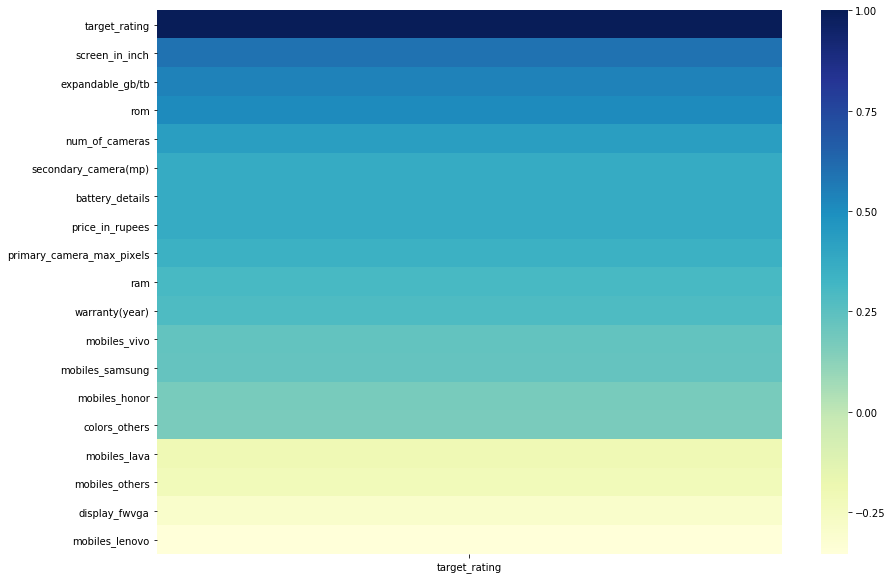

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

ax=sns.heatmap(pd.DataFrame(df_final.corr()['target_rating'].sort_values(ascending = False)), cmap="YlGnBu")

In [169]:
df5.shape

(318, 34)

In [170]:
# Feature selection
varselect = list(df5.corr()['target_rating'][abs(df5.corr()['target_rating'])>0.15].index)
varselect

['price_in_rupees',
 'ram',
 'rom',
 'expandable_gb/tb',
 'screen_in_inch',
 'secondary_camera(mp)',
 'battery_details',
 'warranty(year)',
 'primary_camera_max_pixels',
 'num_of_cameras',
 'mobiles_honor',
 'mobiles_lava',
 'mobiles_lenovo',
 'mobiles_others',
 'mobiles_samsung',
 'mobiles_vivo',
 'colors_others',
 'display_fwvga',
 'target_rating']

In [171]:
df_final = df5[varselect]
display(df_final.head(2), df5.shape, df_final.shape )

,price_in_rupees,ram,rom,expandable_gb/tb,screen_in_inch,secondary_camera(mp),battery_details,warranty(year),primary_camera_max_pixels,num_of_cameras,mobiles_honor,mobiles_lava,mobiles_lenovo,mobiles_others,mobiles_samsung,mobiles_vivo,colors_others,display_fwvga,target_rating
0,5999.0,2.0,16.0,256.0,6.1,5,4000,1,13.0,2,0,0,0,1,0,0,0,0,1
1,5999.0,2.0,16.0,256.0,6.1,5,4000,1,13.0,2,0,0,0,1,0,0,1,0,1


(318, 34)

(318, 19)

In [172]:
# !pip install pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import pydotplus

In [173]:
#Select predictor and response variables
X = df_final.loc[:, df_final.columns != 'target_rating']
y =  df_final.loc[:, df_final.columns == 'target_rating']

In [174]:
# Splitting the dataset into train and test datsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [175]:
dt = DecisionTreeClassifier() 
dt = dt.fit(X_train, y_train)

In [176]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
# y_pred_train, y_pred_test

#### Model Evaluation

In [180]:
confusion_matrix(y_true=list(y_train.target_rating), y_pred=list(y_pred_train))


array([[ 97,   0],
       [  0, 157]], dtype=int64)

In [179]:
# Accuracy on training dataset
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_true=list(y_train.target_rating), y_pred=list(y_pred_train)).ravel()
tn_train, fp_train, fn_train, tp_train

(97, 0, 0, 157)

In [181]:
accuracy_train = (tn_train+tp_train)/(tn_train+fp_train+fn_train+tp_train)*100
"The accuracy on training data is {} %".format(accuracy_train)

'The accuracy on training data is 100.0 %'

In [182]:
# Accuracy on test dataset
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_true=list(y_test.target_rating), y_pred=list(y_pred_test)).ravel()
tn_test, fp_test, fn_test, tp_test

(17, 2, 1, 44)

In [183]:
accuracy_test = (tp_test+tn_test)/(tn_test+fp_test+fn_test+tp_test)*100
"The accuracy on training data is {} %".format(accuracy_test)

'The accuracy on training data is 95.3125 %'